# Part 4 Build Multiple Estimators
Some of the steps we will take to build a model include:
- Selecting the appropriate model
- Building a model
- Testing and training our model
- Evaluating and refining our model

In [1]:
import pandas as pd
import numpy as np

### Loading the Training Dataset

Training:
- polarity : Target 2:positive, 1:neutral, 0:negative
- words : preprocessed sentences
- type : the tags of the words from lemmatizing 

In [2]:
training = pd.read_csv('./train_test_data/training_bs.csv', encoding='utf8')
training.head()

,sentence,sentiment,lem_words,lem_tags,word_tags
0,"As many other reviewers noticed, your order is...",1,many other reviewer notice order be often slow...,JJ JJ NN VB NN VB RB JJ VB VB RB JJ NN VB RB N...,"[many/JJ, other/JJ, reviewer/NN, notice/VB, or..."
1,"If only they delivered, they'd make a mint!",1,only deliver make mint,RB VB VB NN,"[only/RB, deliver/VB, make/VB, mint/NN]"
2,"Food was very good, but not what I would consi...",1,food be very good not consider world,NN VB RB JJ RB VB NN,"[food/NN, be/VB, very/RB, good/JJ, not/RB, con..."
3,"Of course, it is crowded but who cares.",1,course be crowd care,NN VB VB VB,"[course/NN, be/VB, crowd/VB, care/VB]"
4,"Rao is a good restaurant, but it's nothing spe...",1,rao be good restaurant nothing special,NN VB JJ NN NN JJ,"[rao/NN, be/VB, good/JJ, restaurant/NN, nothin..."


In [8]:
X_train = training['lem_words']
y_train = training['sentiment']

## Basline Accuracy

In [9]:
print y_train.value_counts(normalize=True)
baseline = 0.3

1    0.333333
2    0.333333
0    0.333333
Name: sentiment, dtype: float64


## Feature Transformation for Training Data
- random state to keep consistent


In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=1)

## Count Vectorizer and Tfidf


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# initalise the vectoriser 
cvec = CountVectorizer()
cvec.fit(X_train)
#transform training data into sparse matrix
X_train_cvec = cvec.transform(X_train)


from sklearn.feature_extraction.text import TfidfVectorizer
# initalise the vectoriser 
tvec = TfidfVectorizer()
# fit the training data on the model
tvec.fit(X_train)

#transform training data into sparse matrix
X_train_tvec = tvec.transform(X_train)


/Users/annabopeep/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


# Finding an Estimator 
- Choosing an estimator which will perform at its optimum so can be tuned further.
- using both vectorisers to see which ones work best with models

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [104]:
models = [LogisticRegression(),
          RandomForestClassifier(),
          SGDClassifier(),
          SVC(),
          KNeighborsClassifier(), 
          MultinomialNB()
          ]

scores_cvec = []
scores_tvec = []
for model in models:
    print model
    
    score_cvec = cross_val_score(model, X_train_cvec, y_train, cv=3).mean()
    score_tvec = cross_val_score(model, X_train_tvec, y_train, cv=3).mean()
    
    print 'count vectoriser:', score_cvec
    print 'tfidf vectoriser:', score_tvec
    
    
    
    scores_cvec.append(score_cvec)
    scores_tvec.append(score_tvec)
    print '_'*70
    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
count vectoriser: 0.9245961345310842
tfidf vectoriser: 0.9091705543509209
______________________________________________________________________
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
count vectoriser: 0.9350076189224622
tfidf vectoriser: 0.9362529294522198
______________________________________________________________________
SGDClassifier(alpha=0.00

In [112]:
mod = ['LogisticRegression', 'RandomForest', 'StochasticGradientDescent', 'SupportVectorMachine', 'KNeighbors', 'MultinomialNB']
mod_score = pd.DataFrame(zip(mod, scores_cvec, scores_tvec), columns = ['Model', 'scores_cvec', 'scores_tvec'])
mod_score 

,Model,scores_cvec,scores_tvec
0,LogisticRegression,0.924596,0.909171
1,RandomForest,0.935008,0.936253
2,StochasticGradientDescent,0.926265,0.936683
3,SupportVectorMachine,0.470399,0.678837
4,KNeighbors,0.819167,0.833759
5,MultinomialNB,0.879601,0.882927


In [113]:
baseline

0.3

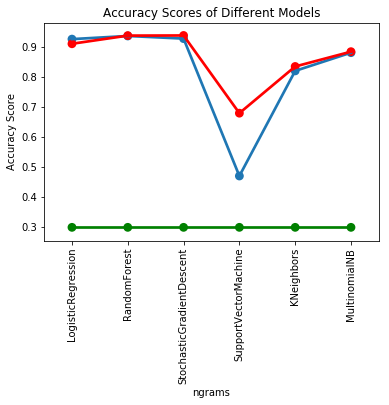

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pointplot(x='Model', y='scores_cvec', data =mod_score, label = 'cvec')
sns.pointplot(x='Model', y='scores_tvec', color='r' ,data =mod_score, label = 'tvec')
sns.pointplot(x='Model', y= [baseline, baseline, baseline, baseline, baseline, baseline], color='g' ,data =mod_score, label = 'baseline')


plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=90)
plt.title('Accuracy Scores of Different Models')
plt.show()

Chosen methods for 

Count Vectorizer - blue
- Logistic Regression
- Random Forest

Tfidf - Red
- Random Forest
- SGDClassifier

RandomForestClassifier	0.935008	0.936253 very close scores so both will be searched
 
With limited time I have chosen a localised method to choose my classifier

 

# Tuning models with highest scores


# Pipline help!
# Pipeline Hyperparameters
## Count Vectorizer and LogReg
### to perform gridsearch for optimal parameters

- Different parameters work best in different combinations and different models. 
- gridseach will help us find the best ones for in combination for logistic regression

from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression())
    ])

parameters = {'vect__max_df': (0.25, 0.5, 0.75, 1.0),
          'vect__max_features': (None, 5000, 10000, 50000),
          'vect__ngram_range': ((1, 1), (1, 2), (1,3), (1,4)), 
          'clf__penalty': ['l1','l2'],
          'clf__solver':['liblinear'],
          'clf__C': np.logspace(-10,10,21)
         }

# we define the gridsearchCV
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
#### we fit it
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print

# cross validation 
print 'Baseline:', baseline
print 'Default Params:', cvec_score.mean()
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")

#### get the best parameters
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

With limited time I have chosen a localised method to choose my classifier

### Notes for model! 
An example of a model statement might look like this:
"Completed a logistic regression using Statsmodels. Calculated the probability of a customer placing another order with the company."
Here, we are using a logistic model because we are trying to determine the probability that a customer might place a return order, which is - at its heart - a classification problem.

Share your technical findings with your fellow data scientists. Explain your goals, describe modeling choices, evaluate model performance, and discuss results. Data science reporting is technical, but don’t forget that you should tell a compelling story about your data.

- **Requirements**: Summarize your goals and metrics for success, variables of interest, and removal of any outliers or data imputation. Your process description should be concise and relevant to your goals. Summarize statistical analysis, including model selection,  implementation, evaluation, and inference. Be convincing – justify all important decisions! Clearly label plots and visualizations. Include an Executive Summary.



#  null values 
I checked for null values when loading the cleaned training data and found 1 row. It was identified that the text of the review was one numeric value before the cleaning process. This must have been an empty value which was then saved into the csv 